In [10]:
# Paso 0: Importar diferentes librerias y recursos sobre los que trabajar

import pandas as pd
import numpy as np
import pylab as plt
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats import weightstats as w
from scipy.stats import shapiro
from scipy.stats import sem
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import seaborn as sns

In [2]:
# Paso 0: Chequear la ubicación para saber si es la folder correcta

%ls

 El volumen de la unidad C es Windows
 El número de serie del volumen es: 788B-24D1

 Directorio de C:\Users\javie\OneDrive\Escritorio\Ironhack\Final Project\HR-Leave\Analysis

19/02/2024  15:55    <DIR>          .
19/02/2024  14:13    <DIR>          ..
19/02/2024  15:55    <DIR>          .ipynb_checkpoints
19/02/2024  15:52            45.474 1. EDA - Categorical variables.ipynb
19/02/2024  15:55               589 EDA - Numerical Variables.ipynb
18/02/2024  18:55           332.178 hr_df.csv
19/02/2024  15:55                72 Untitled.ipynb
               4 archivos        378.313 bytes
               3 dirs  361.743.630.336 bytes libres


In [3]:
# Paso 0: Eliminar restricciones de display para poder ver todas las columnas

pd.options.display.max_columns=None

In [4]:
# Paso 1: Cargar DF limpio sobre el que trabajar

df = pd.read_csv('hr_df.csv')

df

,employee_id,attrition,age,age_interval,gender,education,education_cat,education_area,marital_status,department,job_level,job_role,business_travel,business_travel_cat,distance_home,distance_interval,overtime,standard_hours,daily_rate,hourly_rate,monthly_income,monthly_rate,annual_income,companies_worked,salary_hike_per,stock_option,working_years,training_lastyear,years_company,years_curr_role,years_last_promotion,years_curr_manager,environment_satisf,environment_satisf_cat,worklife_balance,worklife_balance_cat,job_involvement,job_involvement_cat,job_satisfaction,job_satisf_cat,performance_rating,performance_rating_cat,relationship_satisf,relationship_satisf_cat
0,RDO0001,Yes,41,40-49,Female,2,College,Life Sciences,Single,Sales,analyst,Sales Executive,2,rarely,1,1-5,Yes,80,1102,94,5993,19479,83902,8,11,0,8,0,6,4,0,5,2,Medium,1,Bad,3,High,4,Very High,3,Excellent,1,Low
1,RDO0002,No,49,40-49,Male,1,Below College,Life Sciences,Married,Research & Development,analyst,Research Scientist,3,frequently,8,6-10,No,80,279,61,5130,24907,71820,1,23,1,10,3,10,7,1,7,3,High,3,Better,2,Medium,2,Medium,4,Outstanding,4,Very High
2,RDO0003,Yes,37,30-39,Male,2,College,Other,Single,Research & Development,associate,Laboratory Technician,2,rarely,2,1-5,Yes,80,1373,92,2090,2396,29260,6,15,0,7,3,0,0,0,0,4,Very High,3,Better,2,Medium,3,High,3,Excellent,2,Medium
3,RDO0004,No,33,30-39,Female,4,Master,Life Sciences,Married,Research & Development,associate,Research Scientist,3,frequently,3,1-5,Yes,80,1392,56,2909,23159,40726,1,11,0,8,3,8,7,3,0,4,Very High,3,Better,3,High,3,High,3,Excellent,3,High
4,RDO0005,No,27,18-29,Male,1,Below College,Medical,Married,Research & Development,associate,Laboratory Technician,2,rarely,2,1-5,No,80,591,40,3468,16632,48552,9,12,1,6,3,2,2,2,2,1,Low,3,Better,3,High,2,Medium,3,Excellent,4,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,RDO1466,No,36,30-39,Male,2,College,Medical,Married,Research & Development,analyst,Laboratory Technician,3,frequently,23,20+,No,80,884,41,2571,12290,35994,4,17,1,17,3,5,2,0,3,3,High,3,Better,4,Very High,4,Very High,3,Excellent,3,High
1466,RDO1467,No,39,30-39,Male,1,Below College,Medical,Married,Research & Development,specialist,Healthcare Representative,2,rarely,6,6-10,No,80,613,42,9991,21457,139874,4,15,1,9,5,7,7,1,7,4,Very High,3,Better,2,Medium,1,Low,3,Excellent,1,Low
1467,RDO1468,No,27,18-29,Male,3,Bachelor,Life Sciences,Married,Research & Development,analyst,Manufacturing Director,2,rarely,4,1-5,Yes,80,155,87,6142,5174,85988,1,20,1,6,0,6,2,0,3,2,Medium,3,Better,4,Very High,2,Medium,4,Outstanding,2,Medium
1468,RDO1469,No,49,40-49,Male,3,Bachelor,Medical,Married,Sales,analyst,Sales Executive,3,frequently,2,1-5,No,80,1023,63,5390,13243,75460,2,14,0,17,3,9,6,0,8,4,Very High,2,Good,2,Medium,2,Medium,3,Excellent,4,Very High


In [13]:
df_num = df[['age','distance_home','daily_rate','hourly_rate','monthly_income','annual_income',
             'companies_worked','salary_hike_per','working_years','training_lastyear','years_company',
             'years_curr_role','years_last_promotion','years_curr_manager']]

df_num

,age,distance_home,daily_rate,hourly_rate,monthly_income,annual_income,companies_worked,salary_hike_per,working_years,training_lastyear,years_company,years_curr_role,years_last_promotion,years_curr_manager
0,41,1,1102,94,5993,83902,8,11,8,0,6,4,0,5
1,49,8,279,61,5130,71820,1,23,10,3,10,7,1,7
2,37,2,1373,92,2090,29260,6,15,7,3,0,0,0,0
3,33,3,1392,56,2909,40726,1,11,8,3,8,7,3,0
4,27,2,591,40,3468,48552,9,12,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,884,41,2571,35994,4,17,17,3,5,2,0,3
1466,39,6,613,42,9991,139874,4,15,9,5,7,7,1,7
1467,27,4,155,87,6142,85988,1,20,6,0,6,2,0,3
1468,49,2,1023,63,5390,75460,2,14,17,3,9,6,0,8


In [6]:
df.columns

Index(['employee_id', 'attrition', 'age', 'age_interval', 'gender',
       'education', 'education_cat', 'education_area', 'marital_status',
       'department', 'job_level', 'job_role', 'business_travel',
       'business_travel_cat', 'distance_home', 'distance_interval', 'overtime',
       'standard_hours', 'daily_rate', 'hourly_rate', 'monthly_income',
       'monthly_rate', 'annual_income', 'companies_worked', 'salary_hike_per',
       'stock_option', 'working_years', 'training_lastyear', 'years_company',
       'years_curr_role', 'years_last_promotion', 'years_curr_manager',
       'environment_satisf', 'environment_satisf_cat', 'worklife_balance',
       'worklife_balance_cat', 'job_involvement', 'job_involvement_cat',
       'job_satisfaction', 'job_satisf_cat', 'performance_rating',
       'performance_rating_cat', 'relationship_satisf',
       'relationship_satisf_cat'],
      dtype='object')

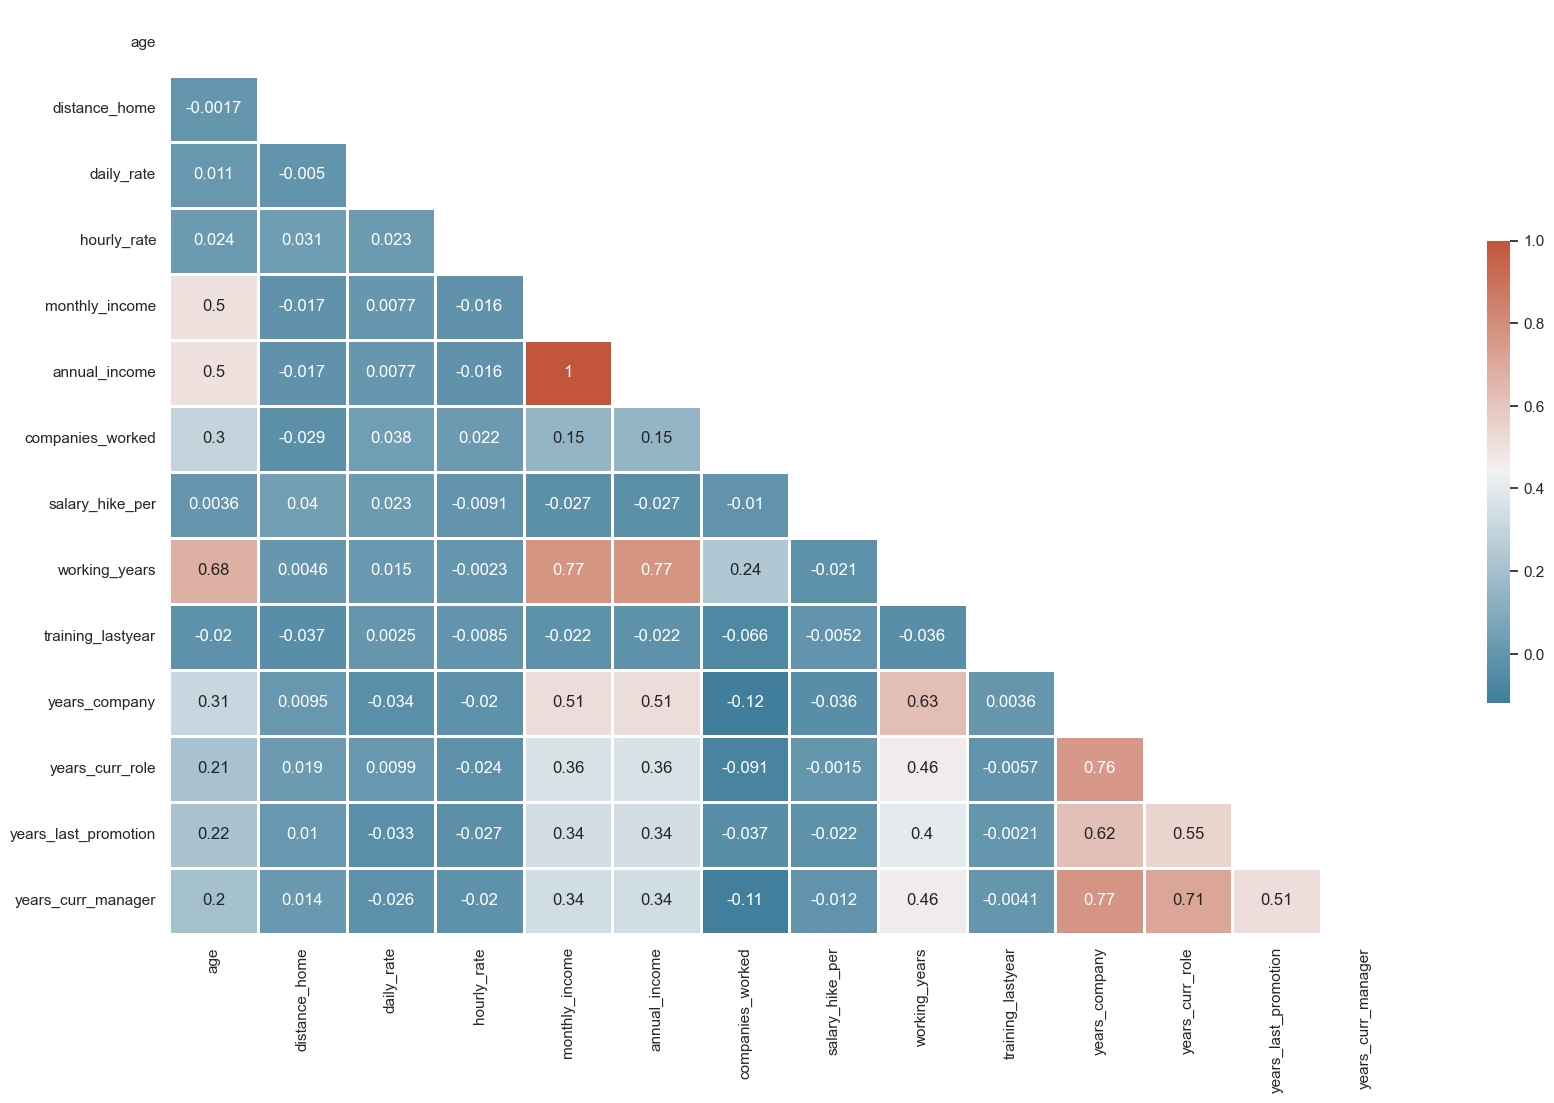

In [14]:
import numpy as np

sns.set_theme(style="white")


# Compute the correlation matrix
corr = df_num.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            annot=True,
            linewidths=.8, 
            cbar_kws={"shrink": .5}
           );